# Homework 07

`By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

# Task: Logistic Regression basics

## Task: Unnormalized perpendicular distance

Consider a three-class classification problem with the following separating hyperplanes:

\begin{align}
1^{st\:}class\:\:\:\:\:\:4x_1+x_{2\:\:}-2=0 \\
2^{nd\:}class\:\:\:\:\:\:-2x_1+2x_{2\:\:}-11=0 \\
3^{rd\:}class\:\:\:\:\:-3x_1-3x_{2\:\:}-1=0 
\end{align}


Calculate the score (unnormalized perpendicular distance) for each class for the test case $\left(x_1,x_2\right)=\:\left(-1,1\right) $

Complete the code below to get the results

In [1]:
import numpy as np

W = np.transpose(np.array([[4., 1.], 
              [-2., 2.], 
              [-3., -3.]])).reshape(2, 3)
b = np.array([-2.,-11., -1.])
x = np.array([-1., 1.])
#==================================================#
#               Your code starts here              #
#==================================================#
#scores = np.dot(x,np.dot(W,b))
scores = np.dot(x,np.dot(W,b))
# TODO - change the following code

print(np.round(scores,3))
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

-38.0


## Task:  Log Loss for logistic regression

Consider two points $x_1$   and $x_2$.  $x_1$  belongs to class 0 and $x_2$  belongs to class 1 ( $y_1=0 $ and $y_2=1$) 

A logistic regression model predicts the class of $x_1$  with a probability of 0.3 and predicts the class of $x_2$ with a probability of 0.6

The log loss formula for the binary case is as follows : $-\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) $

where $m$  is the number of data points , log is Natural Logarithm.


It can also be written in a vectorised form, as follows:
$-\frac{1}{m}\left(y^T_{}\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_{}\right)^T\cdot\log\left(1-p_i\right)\right) $


Calculate the log loss for the points $x_1$  and $x_2$, using any one of the above formulae.

Please report your answer to three decimal places (e.g., report .4554 as .455).

| point| Class| Probability|
| --- | --- | --- |
|  $x_1$ | 0 | 0.3|
|  $x_2$ | 1 | 0.6|


In [2]:
def LogLossBinary(actual, predicted): 
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    return((-1/2) *((0*np.log(0.3) + (1-0)*np.log(1-0.3)) + ((1-0)*np.log(0.6) + (1-1)*np.log(1 - 0.6))))
    # hint: return( )
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
print(f'{np.round(LogLossBinary(np.array([0, 1]),np.array([0.3, 0.6])), 3)}')

0.434


## Task:  Log Loss for multinomical logistic regression

The log loss (a.k.a. cross entropy loss) formula for the multiclass classification is as follows : $$CXE(actual, predicted) = -\frac{1}{m}\sum^m_{i=1}\left(actual_i\cdot\:\log\:\left(predicted_i\right)\:\right) $$

where $m$  is the number of data points, and $log$ is Natural Logarithm

Complete the code to calculate the CXE for the test cases provided. Verify you response using the sklearn.metrics.log_loss.

Please report your answer to three decimal places (e.g., report .4554 as .455).

In [37]:
import numpy as np
from sklearn.metrics import log_loss
# homemade CXE
def cross_entropy(predictions, targets):
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    m = predictions.shape[0]
    cxe = -1/m*np.sum(targets*(np.log(predictions)))
    # cxe = -1/m*np.sum(....)
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#    
    return cxe

# 2 test cases with 4 possible target classes
predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.97]])
targets = np.array([[1,0,0,0],
                   [0,0,0,1]])

homemadeCXE = cross_entropy(predictions, targets)
print('Sklearn Log loss:', np.round(log_loss(targets, predictions),3), '\nHomemade CXE:', np.round(homemadeCXE,3))

Sklearn Log loss: 0.708 
Homemade CXE: 0.708


## Task:  Gradient Descent for logistic regression

Assume you are learning a logistic  regression model  with two a training set consisting of two examples:

$x_1$  = 1 belongs to class 0 ($y_1=0$ )<br />
$x_2$= 2 belongs to class 1 ($y_2=1 $) <br />

The current model weight vector is  W = [1,1], where W[0] denotes the bias term.<br />

Assume a learning rate,  $\alpha= 0.1$ <br />

Assume the gradient is defined as follows:

 $\frac{\delta E}{\delta W} = \frac{1}{m}\sum^m_{i=1}\left(p\left(x_i\right)-y_i\:\right)\cdot X\:\:\:where\:p\left(x\right)\:=\:\frac{1}{1+\:e^{-W^Tx}}\:\: $  and $ m $ is the number of data points

What is the value of W after applying one iteration of gradient descent?

Please report your response to three decimal places.

In [38]:
import numpy as np
X=np.array([[1,1],[1,2]])
w= np.array([1,1])
y= np.array([0,1])
#==================================================#
#               Your code starts here              #
#==================================================#
perpDist = np.dot(X,w)
p = 1 / (1 + np.exp(-perpDist)) #sigmoid
gradient = (1 / len(y)) * np.dot((p-y), X)
print(f'predictions: {p}')
print(f'Gradient: {gradient}')
print(f'w before: {w}')
lr = 0.1
print(f'lr * Gradient: {lr *gradient}')
w = w - (lr * gradient)
print(f'w after: {np.round(w,3)}')
# TODO - change the following code
# perpDist= 
# p =1 / (1 + np.exp(-perpDist)) #sigmoid
# gradient = 
# print(f'predictions: {p}')
# print(f'Gradient: {gradient}')
# print(f'w before: {w}')
# lr = 0.1
# print(f'lr * Gradient: {lr *gradient}')
# w = 
# print(f'w after: {np.round(w,3)}')
          
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

predictions: [0.88079708 0.95257413]
Gradient: [0.4166856  0.39297267]
w before: [1 1]
lr * Gradient: [0.04166856 0.03929727]
w after: [0.958 0.961]


In [39]:
p.shape

(2,)

In [40]:
np.dot((p - y),X)

array([0.8333712 , 0.78594533])

## Task: Binomial Logistic Regression with Regularization

The objective function for the learning a  binomial logistic regression model (log loss) can be stated as follows:


<!-- $$
\underset{\mathbf{\theta}}{\operatorname{argmin}}\left[\operatorname{CXE}\right] = \underset{\mathbf{\theta}}{\operatorname{argmin}} \left[ -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) \right]} \right] $$ -->

$$  -\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) $$



SKLearn supports Ridge and LASSO logistic regression.  For regularized models in scikit-learn that support L1 regularization, we can simply set the `penalty` parameter to `'l1'` to obtain a sparse solution.




### Ridge logistic regression
Regularization is a way of penalizing the model for excessive complexity, and this helps reduce the risk of  overfitting. There are many ways of doing regularization but the following are the major ones:
<!-- 
$$
\underset{\mathbf{\theta}}{\operatorname{argmin}}\left[\operatorname{Ridge\_CXE}\right] = \underset{\mathbf{\theta}}{\operatorname{argmin}} \left[ -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) \right]}  +   \lambda \sum_{j=1}^{n}\theta_j^2 \right] $$ -->

$$ \operatorname{Ridge\_CXE} =  -\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) + \lambda \sum_{j=1}^{n}\theta_j^2 $$



where,

CXE is the cross entropy log loss function,

m is the number of training examples,

n is the number of features,

$\operatorname{\lambda}$ is the penalty coefficient

Based on the above information provided, calculate the Ridge Logistic regression cost (Ridge(CXE)) loss for the following ridge logistic regression model where the bias term is already part of the model (i.e., it is augmented weight vector where the first term  in this vector corresponds to the bias term):

$$X = \begin{bmatrix}
1 & 2 & 0\\
1 & 2 & 3\\
1 & 4 & 3\\
1 & 0 & 1
\end{bmatrix}$$

$$y = \begin{bmatrix}
0\\
1\\
1\\
0
\end{bmatrix}$$

$$\operatorname{\theta} = \begin{bmatrix}
1\\
1\\
-1
\end{bmatrix}$$

The value of lambda $\operatorname{\lambda}$ = 0.1 


Complete the following code snippet and report the Ridge CXE loss

In [41]:
import numpy as np

X = np.array([[1,2,0], [1,2,3], [1,4,3], [1,0,1]]).reshape(-1,3)
theta = np.array([1,1,-1])
y = np.array([0, 1, 1,0])
reg_lambda = 0.1
#==================================================#
#               Your code starts here              #
#==================================================#
p_hat = 1 / (1 + np.exp(-np.dot(X,theta)))
CXE_loss = -1/len(y) * sum(y * np.log(p_hat) + (1-y) * (np.log(1-p_hat)))
Ridge_CXE_loss = CXE_loss + (reg_lambda * sum(np.square(theta[1:])))
# TODO - change the following code
#p_hat = ...
#CXE_loss = ...
#Ridge_CXE_loss = ...          
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
print("The total Ridge CXE loss is", Ridge_CXE_loss.round(2))

The total Ridge CXE loss is 1.34


### Lasso logistic regression
The Lasso Regression logistic regression loss function can be written as follows:

$$
\operatorname{Lasso\_CXE}(\boldsymbol{\theta}) = \operatorname{CXE}(\boldsymbol{\theta}) + \lambda \sum\limits_{i=1}^{n}\left| \theta_i \right|
$$


where,

CXE is the cross entropy log loss function,

m is the number of training examples,

n is the number of features,

$\operatorname{\lambda}$ is the penalty coefficient

Based on the above information provided, calculate the Lasso Logistic regression cost (Lasso(CXE)) loss for the following Lasso logistic regression model where the bias term is already part of the model (i.e., it is augmented weight vector where the first term  in this vector corresponds to the bias term):

$$X = \begin{bmatrix}
1 & 2 & 0\\
1 & 2 & 3\\
1 & 4 & 3\\
1 & 0 & 1
\end{bmatrix}$$

$$y = \begin{bmatrix}
0\\
1\\
1\\
0
\end{bmatrix}$$

$$\operatorname{\theta} = \begin{bmatrix}
1\\
-2\\
1
\end{bmatrix}$$

The value of lambda $\operatorname{\lambda}$ = 0.1 


Complete the following code snippet and report the Lasso CXE loss

In [42]:
import numpy as np

X = np.array([[1,2,0], [1,2,3], [1,4,3], [1,0,1]]).reshape(-1,3)
theta = np.array([1,2,-1])
y = np.array([0, 1, 1,0])
lass_lambda = 0.1
#==================================================#
#               Your code starts here              #
#==================================================#
p_hat = 1 / (1 + np.exp(-np.dot(X,theta)))
CXE_loss = -1/len(y) * sum(y * np.log(p_hat) + (1-y) * (np.log(1-p_hat)))
Lasso_CXE_loss = CXE_loss + (lass_lambda * sum(theta[1:]))
# TODO - change the following code
#p_hat = ...
#CXE_loss = ...
#Lasso_CXE_loss = ...          
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
print("The total Lasso CXE loss is", Lasso_CXE_loss.round(2))

The total Lasso CXE loss is 1.56



### Elastic Net logistic Regression

*Elastic Net cost function*

$$
\operatorname{Elastic\_CXE}(\mathbf{\theta}) = \operatorname{CXE}(\boldsymbol{\theta}) + r \lambda \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \lambda \sum\limits_{i=1}^{n}{{\theta_i}^2}
$$




### Feature Selection Using Regularization

Which of the following flavours of regularization leads to feature selection?

<input type="radio"> Ridge regularization
<BR><input type="radio"> Lasso regularization
<BR><input type="radio"> Elastic Net

The **LASSO** method regularizes model parameters by shrinking the regression coefficients, reducing some of them to zero, thereby offering feature selection.

# CIFAR10

DOWNLOAD DATA FROM [HERE](http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) AND PUT IT TO THE DATA FOLDER

The [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. Such a situation is called **multiclass** classification in oppose to **multilabel** classification when each example may have multiple label.

One can see state-of-the-art results [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

In [9]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Set style for plotting

In [10]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [11]:
np.random.seed(42)

## Data

Unarchive data
Please take care of changing the directory path to your own path.

In [12]:
tar = tarfile.open("data/cifar-10-python.tar.gz", "r:gz")
tar.extractall("data")
tar.close()

Data are stored as a memory dump with python $\text{dict}$ object. It was created using **pickle** function. To read one should "unpickle" it.

In [14]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding="latin1")
    fo.close()
    return dict

Data are also splitted in to 5 pieces for conveniece. Let's read them all and concatenate. Please take care of changing the directory path to your own path.

> Indented block



In [15]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)

Read test data. In this dataset train/test split is provided by authors of the dataset to be able to consistently evaluate solutions. Please take care of changing the directory path to your own path.

In [16]:
data_batch = unpickle("data/cifar-10-batches-py/test_batch")

X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

data_batch["data"]

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

Read meta-information file with the names of the classes

In [17]:
classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]

## Pre-processing

We have too many data

In [18]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 50000
Test size: 10000


Let's take only 10% of them to train faster

In [19]:
subsample_rate = 0.1
np.random.seed(42)

We want to preserve the same quantity ratio between classes. In python such an option is called **stratification**. Let's randomly (with fixed initial seed for the sake of reproducibility) divide part of train data

In [20]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)

The same for test

In [21]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

Indeed, we preserved the number of objects of each class

In [22]:
unique_train = np.unique(y_train, return_counts=True)
list(zip(np.array(classes)[unique_train[0]], unique_train[1]))

[('airplane', 500),
 ('automobile', 500),
 ('bird', 500),
 ('cat', 500),
 ('deer', 500),
 ('dog', 500),
 ('frog', 500),
 ('horse', 500),
 ('ship', 500),
 ('truck', 500)]

## Visualization

For now each object has the following shape

In [23]:
X_train[0].shape

(3072,)

$3072 = 32 \times 32 \times 3$ where $32 \times 32$ is the size of the image in pixels and $3$ is the number of channels (RGB)

To show this array as an image let's reshape it in the needed from with the shape $(32, 32, 1)$

In [24]:
def show_pic(x):
    plt.imshow(x.reshape((3, 32, 32)).transpose(1, 2, 0).astype("uint8"))
    plt.axis("off")

Draw one pic from each class

In [25]:
classes_idx_examples = np.zeros(10, dtype=np.int)
for i in range(10):
    classes_idx_examples[i] = np.where(y_train == i)[0][0]

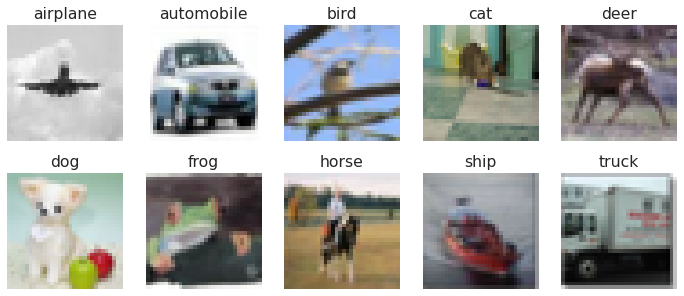

In [26]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_pic(X_train[classes_idx_examples[i]])
    plt.title(classes[i])

Let's use Sklearn implementation of algorithms to have a benchmark.

Also one should **always** track the results of the experiments to be able to compare different approaches. Let's create pandas $\text{DataFrame}$ for this purpose.

In [27]:
experimentLog = pd.DataFrame(columns=["Best Pipeline", "Dataset", "TrainAcc", "TestAcc", "Description",])

For now it is empty, but will be filled in later

In [28]:
experimentLog

,Best Pipeline,Dataset,TrainAcc,TestAcc,Description


## Defining model

Let's try Multinomial Logistic Regression (see theory in lectures)
Sklearn implementation of LogRegression implies mandatory usage of regularization (it almost always works better with it preventing overfitting). We want to explore very basic LogRegression model thus to "disable" regularization we need to reduce its impact to almost zero. It can be done by setting regularization constant $\lambda$ to very small value (in sklearn we define inverse regularization constant $C = 1 / \lambda$ thus we need to make it big)

Here we use Sklearn $\text{LogisticRegression}$ with few options:
* $\text{multi_class} = \text{"multinomial"} -$we want to build softmax classifier (there are other ways of dealing with multiclass setting for Logistic Regression)
* $\text{C} = 10^6-$ for now we don't want to use regularization; $\text{C}$ is the inverse regularization constant which is $\text{C} = \frac{1}{\lambda}$; thus we should make $\text{C}$ big to turn off regulazrization
* $\text{solver} = \text{sag} -$ optimization algorithm to use; Stochastic Average Gradient. Stochastic Gradient Descent method gitters massively. This is due to the not very good approximation of gradient (only by one example). To neglect this error one can simply average gradient across last few steps; that is exectly what $\text{sag}$ does
* $\text{max_iter} = 15 -$ the number of passes over the training data (aka epochs)

# Task: Explore Logistic Regression, Logistic Regression with Regularization (L1, L2)
Model the CIFAR-10 dataset using Logistic Regression (no penalty term), Logistic Regression with Lasso Regularization (L1) . Explore different values $\text{C}$ is the inverse regularization constant which is $\text{C} = \frac{1}{\lambda}$ that are listed here : {C=1.0, C=10.0, C=100.0, C=1000.0, C=10000.0}

Please reports your experimental results using the `results` table.   

In [30]:
from sklearn.model_selection import KFold


for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.02
##############################################################################
# Set up split for train and test data
# Make sure you are using the stratify parameter,
# setting the random_state to 42 ans using a subset of 2% of the CIFAR10 dataset
#==================================================#
#               Your code starts here              #
#==================================================#
X_train, _, y_train, _ = train_test_split(X_train,y_train,stratify=y_train,train_size=subsample_rate,random_state=42)
X_test, _, y_test, _ = train_test_split(X_test,y_test,stratify=y_test,train_size=subsample_rate,random_state=42)
# TODO - change the following code
# X_train, _, y_train, _ = train_test_split()
# X_test, _, y_test, _ = train_test_split()                 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


Before predicting, let's standardize the data first

Rescaling, is a simple method for bringing your data into a  range [0, 1]. This can be accomplished by simply dividing each pixel by 255, the max grayscale intensity level.

In [31]:
X_train = X_train/255
X_test = X_test/255 
y_train = np.float64(y_train)

## Task: Logistic Regression with and without Regularization

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from time import time


# Create a pipeline

clf_pipe = Pipeline([("lr", LogisticRegression(solver='saga'))])


# #############################################################################
# Set up Grid search using the defined pipeline 
# and parameters 
# Make sure to use 3 folds for cross validation
# use scoring metric as accuracy
#==================================================#
#               Your code starts here              #
#==================================================#
# select handful of parameters to explore

params = {'lr__C':[1.0, 10.0, 100.0, 1000.0, 10000.0], 
          'lr__penalty':['none','l1','l2']}

clf_gridsearch = GridSearchCV(clf_pipe,params,cv=3,verbose=1,scoring='accuracy' )

# TODO - change the following code
# params = {'lr__C':[1.0, 10.0, 100.0, 1000.0, 10000.0],
#           'lr__penalty':[..., ..., ...] # use No penalty, l1 and l2 }
# clf_gridsearch = GridSearchCV(....)                    
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


print("Performing grid search...")
print("pipeline:", [name for name, _ in clf_pipe.steps])
print("parameters:")
print(params)
t0 = time()
clf_gridsearch.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best parameters set found on development set:")
print()
print(clf_gridsearch.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_gridsearch.cv_results_['mean_test_score']
stds = clf_gridsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_gridsearch.cv_results_['params']):
     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
scoring='accuracy'
 # Print best accuracy score and best parameter combination
print("Best %s score: %0.3f" %(scoring, clf_gridsearch.best_score_))
print("Best parameters set:")
best_parameters = clf_gridsearch.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
#Sort the grid search results in decreasing order of average         
sortedGridSearchResults = sorted(zip(clf_gridsearch.cv_results_["params"], clf_gridsearch.cv_results_["mean_test_score"]), 
       key=lambda x: x[1], reverse=True)
print(f'Top 2 GridSearch results: ({scoring}, hyperparam Combo)\n {sortedGridSearchResults[0]}\n {sortedGridSearchResults[1]}\n\n\n')
print()
y_pred_train = clf_gridsearch.predict(X_train)
print(f"Training accuracy by best pipeline is: {accuracy_score(y_pred_train, y_train):.3f}")
y_pred_test = clf_gridsearch.predict(X_test)
print(f"Testing accuracy by best pipeline is: {accuracy_score(y_pred_test, y_test):.3f}")

Performing grid search...
pipeline: ['lr']
parameters:
{'lr__C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'lr__penalty': ['none', 'l1', 'l2']}
Fitting 3 folds for each of 15 candidates, totalling 45 fits
done in 917.450s

Best parameters set found on development set:

{'lr__C': 1.0, 'lr__penalty': 'l1'}

Grid scores on development set:

0.295 (+/-0.011) for {'lr__C': 1.0, 'lr__penalty': 'none'}
0.332 (+/-0.051) for {'lr__C': 1.0, 'lr__penalty': 'l1'}
0.300 (+/-0.009) for {'lr__C': 1.0, 'lr__penalty': 'l2'}
0.295 (+/-0.011) for {'lr__C': 10.0, 'lr__penalty': 'none'}
0.300 (+/-0.018) for {'lr__C': 10.0, 'lr__penalty': 'l1'}
0.295 (+/-0.011) for {'lr__C': 10.0, 'lr__penalty': 'l2'}
0.295 (+/-0.013) for {'lr__C': 100.0, 'lr__penalty': 'none'}
0.295 (+/-0.011) for {'lr__C': 100.0, 'lr__penalty': 'l1'}
0.294 (+/-0.009) for {'lr__C': 100.0, 'lr__penalty': 'l2'}
0.295 (+/-0.011) for {'lr__C': 1000.0, 'lr__penalty': 'none'}
0.295 (+/-0.011) for {'lr__C': 1000.0, 'lr__penalty': 'l1'}
0.295 (+/-0.011

In [43]:
train_acc = accuracy_score(y_pred_train, y_train)
test_acc = accuracy_score(y_pred_test, y_test)

In [44]:
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Best Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Description",])
experimentLog.loc[len(experimentLog)] =[f"{clf_gridsearch.best_params_}", "CIFAR-40", 
                                        f"{train_acc*100:8.2f}%", f"{test_acc*100:8.2f}%",
                                        "CIFAR logistic regression"]
experimentLog

,Best Pipeline,Dataset,TrainAcc,TestAcc,Description
0,"{'lr__C': 1.0, 'lr__penalty': 'l1'}",CIFAR-40,65.70%,34.00%,CIFAR logistic regression


# The Great Race

## BG: Part 1: Pima Diabetes classification

It is important to compare the performance of multiple different machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.

In the example below six different classification
algorithms (some of which you will recognize!) are compared on a single dataset:

*  Logistic Regression
*  Logistic Regression with L1 and L2 Regulaization
*  Linear Discriminant Analysis
*  k-Nearest Neighbors
*  Classification and Regression Trees
*  Naive Bayes
* Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

,0,1,2,3,4,5,6,7
mean_fit_time,0.006772,0.002963,0.002633,0.003557,0.001456,0.003229,0.001363,0.010654
std_fit_time,0.002512,0.00022,0.00008,0.004361,0.000319,0.000681,0.000085,0.001733
mean_score_time,0.000727,0.000416,0.00043,0.000483,0.003422,0.000578,0.000495,0.002387
std_score_time,0.000338,0.000029,0.000046,0.000106,0.000804,0.000159,0.000025,0.000568
param_clf,LogisticRegression(penalty='none'),"LogisticRegression(C=10, penalty='l1', solver=...","LogisticRegression(C=10, solver='saga')",LinearDiscriminantAnalysis(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC()
params,{'clf': LogisticRegression(penalty='none')},"{'clf': LogisticRegression(C=10, penalty='l1',...","{'clf': LogisticRegression(C=10, solver='saga')}",{'clf': LinearDiscriminantAnalysis()},{'clf': KNeighborsClassifier()},{'clf': DecisionTreeClassifier()},{'clf': GaussianNB()},{'clf': SVC()}
split0_test_score,0.790323,0.790323,0.790323,0.774194,0.741935,0.709677,0.725806,0.790323
split1_test_score,0.741935,0.741935,0.741935,0.725806,0.66129,0.693548,0.677419,0.693548
split2_test_score,0.741935,0.741935,0.741935,0.725806,0.725806,0.741935,0.790323,0.790323
split3_test_score,0.754098,0.754098,0.754098,0.754098,0.770492,0.754098,0.770492,0.770492


,0,1,2,3,4,5,6,7
split0_test_score,0.790323,0.790323,0.790323,0.774194,0.741935,0.709677,0.725806,0.790323
split1_test_score,0.741935,0.741935,0.741935,0.725806,0.66129,0.693548,0.677419,0.693548
split2_test_score,0.741935,0.741935,0.741935,0.725806,0.725806,0.741935,0.790323,0.790323
split3_test_score,0.754098,0.754098,0.754098,0.754098,0.770492,0.754098,0.770492,0.770492
split4_test_score,0.786885,0.786885,0.786885,0.803279,0.737705,0.672131,0.770492,0.803279
split5_test_score,0.721311,0.721311,0.721311,0.721311,0.737705,0.672131,0.721311,0.721311
split6_test_score,0.688525,0.688525,0.688525,0.622951,0.639344,0.672131,0.655738,0.639344
split7_test_score,0.754098,0.754098,0.754098,0.737705,0.672131,0.737705,0.770492,0.754098
split8_test_score,0.770492,0.770492,0.770492,0.786885,0.721311,0.622951,0.721311,0.754098
split9_test_score,0.786885,0.786885,0.786885,0.786885,0.770492,0.819672,0.819672,0.836066


--------------------------------------------------


,Model,mean_acc,std_acc
0,LR,0.754,0.031
1,LR+L1,0.754,0.031
2,LR+L2,0.754,0.031
3,LDA,0.744,0.049
4,KNN,0.718,0.043
5,CART,0.71,0.053
6,GNB,0.742,0.049
7,SVM,0.755,0.055


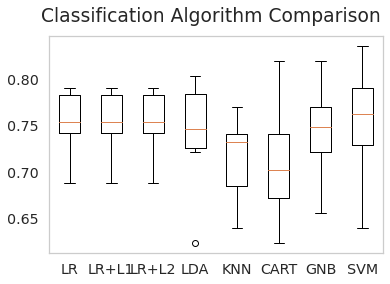




------------------------------------------------------------
Best pipeline is Pipeline(steps=[('scale', StandardScaler()), ('clf', SVC())])
Best model is {'clf': SVC()}
Test Accuracy on the heldout test set by best pipeline is: 0.786





,Best Pipeline,Dataset,TrainAcc,TestAcc,Description
0,"{'lr__C': 1.0, 'lr__penalty': 'l1'}",CIFAR-40,65.70%,34.00%,CIFAR logistic regression
1,{'clf': SVC()},Pima Diabetes,82.87%,78.57%,Great Race Pima Diabetes best model


In [45]:
# Compare Algorithms

import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# load dataset
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
dataframe = dataframe.iloc[1:]

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)


# Create a pipeline
clf_pipe = Pipeline([('scale', StandardScaler()), ('clf', None)]) # Placeholder Estimator
    
# Candidate learning estimators
estimators = [{'clf': [LogisticRegression(penalty='none')]},
              {'clf': [LogisticRegression(penalty='l1', C=10, solver='saga')]},
              {'clf': [LogisticRegression(penalty='l2', C=10, solver='saga')]},
                {'clf': [LinearDiscriminantAnalysis()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [DecisionTreeClassifier()]},
                {'clf': [GaussianNB()]},
                {'clf': [SVC()]},
               ]
ml_name = ['LR','LR+L1','LR+L2','LDA','KNN','CART','GNB','SVM']

clf_gridsearch = GridSearchCV(clf_pipe, param_grid = estimators, cv = 10, scoring='accuracy')
clf_gridsearch.fit(X_train, y_train)

results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
display(results_df)
cv_by_model_test_scores=results_df.iloc[6:16, 0:len(ml_name)]
display(cv_by_model_test_scores)
print("-"*50)
Mean_acc = np.round(np.mean(cv_by_model_test_scores, 0), 3)
std_acc = np.round(np.std(cv_by_model_test_scores, 0), 3)
display(pd.DataFrame(np.c_[ml_name, Mean_acc, std_acc], 
                     columns=["Model", "mean_acc", "std_acc"]))
   
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(cv_by_model_test_scores)
ax.set_xticklabels(ml_name)
pyplot.grid()
pyplot.show()

clf_pipeline = clf_gridsearch.best_estimator_
print("\n\n")
print("-"*60)
print(f"Best pipeline is {clf_pipeline}")
print(f"Best model is {clf_gridsearch.best_params_}")
y_pred_train = clf_pipeline.predict(X_train)
y_pred_test = clf_pipeline.predict(X_test)


train_acc = accuracy_score(y_pred_train, y_train)
test_acc = accuracy_score(y_pred_test, y_test)

print(f"Test Accuracy on the heldout test set by best pipeline is: {test_acc:.3f}")
print("\n\n")

try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Best Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Description",])
experimentLog.loc[len(experimentLog)] =[f"{clf_gridsearch.best_params_}", "Pima Diabetes", 
                                        f"{train_acc*100:8.2f}%", f"{test_acc*100:8.2f}%",
                                        "Great Race Pima Diabetes best model"]

experimentLog

Above we produced a box and whisker plot showing the spread of the accuracy scores
across each cross-validation fold for each algorithm.

From these results, it would suggest that both logistic regression and support vector machine classifies are perhaps worthy of further study on this problem.

## Task: CIFAR10 Great Race 
Repeat the above RACE for the CIFAR10 dataset and draw some conclusions. Complete the code below.

### Reload CIFAR-10 dataset

In [46]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding="latin1")
    fo.close()
    return dict

for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.02

#downsample training data
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
#downsample testing data
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

### Run Great Race on CIFAR-10 dataset

Fitting 10 folds for each of 8 candidates, totalling 80 fits


,0,1,2,3,4,5,6,7
mean_fit_time,2.158782,42.160352,1.882409,1.143995,0.01677,1.822581,0.037599,1.541758
std_fit_time,0.226247,2.24879,0.04625,0.081237,0.00096,0.11099,0.003861,0.065383
mean_score_time,0.003279,0.002617,0.003649,0.002146,0.019638,0.002022,0.012513,0.205135
std_score_time,0.00105,0.000558,0.001226,0.00035,0.002902,0.000107,0.000985,0.021788
param_clf,LogisticRegression(penalty='none'),"LogisticRegression(C=10, penalty='l1', solver=...",LogisticRegression(),LinearDiscriminantAnalysis(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC()
params,{'clf': LogisticRegression(penalty='none')},"{'clf': LogisticRegression(C=10, penalty='l1',...",{'clf': LogisticRegression()},{'clf': LinearDiscriminantAnalysis()},{'clf': KNeighborsClassifier()},{'clf': DecisionTreeClassifier()},{'clf': GaussianNB()},{'clf': SVC()}
split0_test_score,0.22,0.26,0.24,0.2,0.28,0.2,0.3,0.36
split1_test_score,0.26,0.26,0.25,0.19,0.23,0.19,0.26,0.33
split2_test_score,0.28,0.35,0.29,0.15,0.26,0.3,0.32,0.36
split3_test_score,0.23,0.37,0.27,0.23,0.25,0.21,0.4,0.37


,0,1,2,3,4,5,6,7
split0_test_score,0.22,0.26,0.24,0.2,0.28,0.2,0.3,0.36
split1_test_score,0.26,0.26,0.25,0.19,0.23,0.19,0.26,0.33
split2_test_score,0.28,0.35,0.29,0.15,0.26,0.3,0.32,0.36
split3_test_score,0.23,0.37,0.27,0.23,0.25,0.21,0.4,0.37
split4_test_score,0.29,0.39,0.32,0.2,0.25,0.22,0.3,0.39
split5_test_score,0.26,0.34,0.28,0.19,0.26,0.22,0.24,0.43
split6_test_score,0.23,0.34,0.26,0.17,0.21,0.17,0.3,0.37
split7_test_score,0.29,0.31,0.3,0.17,0.27,0.22,0.36,0.43
split8_test_score,0.3,0.31,0.3,0.12,0.21,0.26,0.29,0.35
split9_test_score,0.21,0.22,0.23,0.16,0.29,0.24,0.34,0.4


--------------------------------------------------


,Model,mean_acc,std_acc
0,LR,0.257,0.031
1,LR+L1,0.315,0.051
2,LR+L2,0.274,0.028
3,LDA,0.178,0.029
4,KNN,0.251,0.026
5,CART,0.223,0.035
6,GNB,0.311,0.044
7,SVM,0.379,0.031


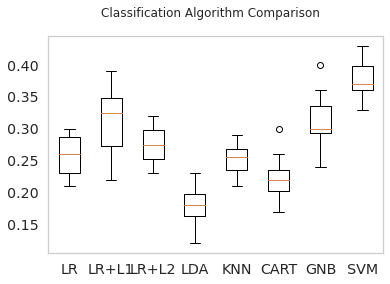




------------------------------------------------------------
Best pipeline is Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SVC())])
Best model is {'clf': SVC()}
Test Accuracy on the heldout test set by best pipeline is: 0.405





,Best Pipeline,Dataset,TrainAcc,TestAcc,Description
0,"{'lr__C': 1.0, 'lr__penalty': 'l1'}",CIFAR-40,65.70%,34.00%,CIFAR logistic regression
1,{'clf': SVC()},Pima Diabetes,82.87%,78.57%,Great Race Pima Diabetes best model
2,{'clf': SVC()},CIFAR-10,78.50%,40.50%,Great Race CIFAR-10 best model


In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Create a pipeline
# do a min-max scaling
clf_pipe = Pipeline([("scaler", MinMaxScaler()), ('clf', None)]) # Placeholder Estimator
    
# Candidate learning estimators
estimators = [{'clf': [LogisticRegression(penalty='none')]},
              {'clf': [LogisticRegression(penalty='l1', C=10, solver='saga')]},
              {'clf': [LogisticRegression(penalty='l2')]},
                {'clf': [LinearDiscriminantAnalysis()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [DecisionTreeClassifier()]},
                {'clf': [GaussianNB()]},
                {'clf': [SVC()]},
               ]

ml_name = ['LR','LR+L1','LR+L2','LDA','KNN','CART','GNB','SVM']

# Create grid search 

#==================================================#
#               Your code starts here              #
#==================================================#
# Create grid search using the pipeline and estimators as the parametes, 
#use cv = 10 and 'accuracy' for the scoring parameter
clf_gridsearch = GridSearchCV(clf_pipe,param_grid = estimators,cv=10,verbose=1,scoring='accuracy')
#TODO:complete the gridsearch code
#clf_gridsearch = GridSearchCV...
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

clf_gridsearch.fit(X_train, y_train)


results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
#display(results_df)
display(results_df)
cv_by_model_test_scores=results_df.iloc[6:16, 0:len(ml_name)]
display(cv_by_model_test_scores)
print("-"*50)
Mean_acc = np.round(np.mean(cv_by_model_test_scores, 0), 3)
std_acc = np.round(np.std(cv_by_model_test_scores, 0), 3)
display(pd.DataFrame(np.c_[ml_name, Mean_acc, std_acc], 
                     columns=["Model", "mean_acc", "std_acc"]))
     
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(cv_by_model_test_scores)
ax.set_xticklabels(ml_name)
pyplot.grid()
pyplot.show()


clf_pipeline = clf_gridsearch.best_estimator_
print("\n\n")
print("-"*60)
print(f"Best pipeline is {clf_pipeline}")
print(f"Best model is {clf_gridsearch.best_params_}")

y_pred_train = clf_pipeline.predict(X_train)
y_pred_test = clf_pipeline.predict(X_test)


train_acc = accuracy_score(y_pred_train, y_train)
test_acc = accuracy_score(y_pred_test, y_test)


print(f"Test Accuracy on the heldout test set by best pipeline is: {test_acc:.3f}")
print("\n\n")

try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Best Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Description",])
experimentLog.loc[len(experimentLog)] =[f"{clf_gridsearch.best_params_}", "CIFAR-10", 
                                        f"{train_acc*100:8.2f}%", f"{test_acc*100:8.2f}%",
                                        "Great Race CIFAR-10 best model"]

experimentLog

# Background: HyperParameter tuning on steroids for text data
In this section, please review and run the following subsections to get familier on how to build a multi-class classifier from text documents.  

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this section you will revisit how to tune the parameters of machine learning algorithms in Python using the scikit-learn.

Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can perform a grid search using the `GridSearchCV` class. 
In this section we will focus on setting up a pipeline for **text classifiction**, though it can be adapted to any machine learning problem.

## Sample pipeline for text feature extraction and evaluation


The dataset used in this section is the 20 newsgroups dataset which will be
automatically downloaded and then cached and reused for the document
classification example.

<PRE>
>>> from sklearn.datasets import fetch_20newsgroups
>>> newsgroups_train = fetch_20newsgroups(subset='train')

>>> from pprint import pprint
>>> pprint(list(newsgroups_train.target_names))
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
</PRE>
You can adjust the number of categories by giving their names to the dataset
loader or setting them to None to get the 20 of them.

Here is a sample output of a run on a quad-core machine::

<PRE>  Loading 20 newsgroups dataset for categories:
  ['alt.atheism', 'talk.religion.misc']
  1427 documents
  2 categories
  
  
  Performing grid search...
  pipeline: ['vect', 'tfidf', 'clf']
  parameters:
  {'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07),
   'clf__n_iter': (10, 50, 80),
   'clf__penalty': ('l2', 'elasticnet'),
   'tfidf__use_idf': (True, False),
   'vect__max_n': (1, 2),
   'vect__max_df': (0.5, 0.75, 1.0),
   'vect__max_features': (None, 5000, 10000, 50000)}
  done in 1737.030s

  Best score: 0.940
  Best parameters set:
      clf__alpha: 9.9999999999999995e-07
      clf__n_iter: 50
      clf__penalty: 'elasticnet'
      tfidf__use_idf: True
      vect__max_n: 2
      vect__max_df: 0.75
      vect__max_features: 50000
</PRE>

## From documents to a "document by term" frequency matrix  

Convert a set of  documents to a "document by term" frequency matrix

The following corpus: 

`corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]`

gets converted to a "document by term" frequency matrix

`array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]]
       `

where the 9 columns are labeled with the following 9 words extracted:

`['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this']`
      
By default, words of length 2 characters or more a kept as the vocabulary.

For more details see (here)[http://scikit-learn.org/stable/modules/feature_extraction.html]

In [49]:
# Let’s use the following corpus (text dataset).
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

In [50]:
#CountVectorizer implements both tokenization and occurrence counting in a single class:
from sklearn.feature_extraction.text import CountVectorizer

# Here we will tokenize and count the word occurrences of this minimalistic corpus of text documents:
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
X                              
#<4x9 sparse matrix of type '<... 'numpy.int64'>'
#    with 19 stored elements in Compressed Sparse ... format>

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [51]:
# The default configuration tokenizes the string by extracting words of at least 2 
# letters. The specific function that does this step can be requested explicitly:  
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
    ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [52]:
vectorizer.get_feature_names() == (
     ['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this'])

True

In [53]:
X.toarray()     #recover document by term frequency matrix        
#array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
#       [0, 1, 0, 1, 0, 2, 1, 0, 1],
#       [1, 0, 0, 0, 1, 0, 1, 1, 0],
#       [0, 1, 1, 1, 0, 0, 1, 0, 1]]...)
display(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()))
print(corpus)

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,1,0,1,0,2,1,0,1
2,1,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,1,0,1


['This is the first document.', 'This is the second second document.', 'And the third one.', 'Is this the first document?']


## Text classification pipeline

Note below we use a generic Linear classifier class, SGDClassifier.  Here different classifiers can be engaged by specifying different loss fucntions. Here are some of the options (note we will focus on Logistic regression that is engaged thru specifying the loss as `'log'`:


`loss : str, default: ‘hinge’

The loss function to be used. Defaults to ‘hinge’, which gives a linear SVM.

The possible options are ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.

The ‘log’ loss gives logistic regression, a probabilistic classifier. ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. ‘squared_hinge’ is like hinge but is quadratically penalized. ‘perceptron’ is the linear loss used by the perceptron algorithm. The other losses are designed for regression but can be useful in classification as well; see SGDRegressor for a description.`

### EDA on 20 newsgroups dataset

The 20 newsgroups dataset has 11314 training examples, 7532 test cases.


#### Training Set

In [54]:
from sklearn.datasets import fetch_20newsgroups
# Uncomment the following to do the analysis on all the categories
categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

trainData = fetch_20newsgroups(subset='train', categories=categories)
data = trainData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class", data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

Loading 20 newsgroups dataset for categories:
None
11314 documents
20 categories

Sample document Target Class comp.graphics
Sample document body From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.e

#### Test Set

In [55]:
print(categories)
testData = fetch_20newsgroups(subset='test', categories=categories)
data = testData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class [%s]"% data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

None
7532 documents
20 categories

Sample document Target Class [comp.graphics]
Sample document body From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.

Rick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto
Send a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!
          RICK MILLER // 16

In [56]:
print("Number of (Train, Test) data (%d, %d)" %(len(trainData.data),  len(testData.data) ))

Number of (Train, Test) data (11314, 7532)


### Grid search over CountVectorizer and Logistic Regression pipeline

In [57]:
%%time
# This code is adopted  and has been modified from 
#
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause


from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.exceptions import ConvergenceWarning 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings


   
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set 
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor 
# with a simple classifier (logistic regression)

pipeline = Pipeline([
    ('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    #('tfidf', TfidfTransformer()), #ignore for now
    ('clf', SGDClassifier(loss='log', max_iter=5)),  #let's use logistic regression
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    # jgs 'vect__max_features': (None, 500, 5000, 10000, 50000),
    # jgs 'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l1', 'l2', 'elasticnet'),
    #'clf__penalty': ('l1', 'l2', 'elasticnet'),
    #'clf__loss': ('log', 'hinge'),  #hinge linear SVM
    #'clf__n_iter': (10, 50, 80),
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    # Please ignore the Convergence warnings, it is expected behavior

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l1', 'l2', 'elasticnet')}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
done in 4.570s

Best score: 0.877
Best parameters set:
	clf__alpha: 1e-05
	clf__penalty: 'elasticnet'
CPU times: user 668 ms, sys: 120 ms, total: 789 ms
Wall time: 4.85 s


## Confusion matrices
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

Let's start with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes):

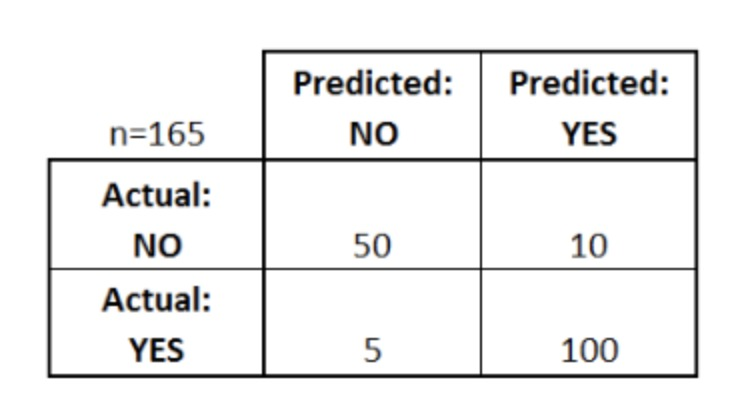

What can we learn from this matrix?

* There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
* The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
* Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
* In reality, 105 patients in the sample have the disease, and 60 patients do not.

Let's now define the most basic terms, which are whole numbers (not rates):

* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

I've added these terms to the confusion matrix, and also added the row and column totals:

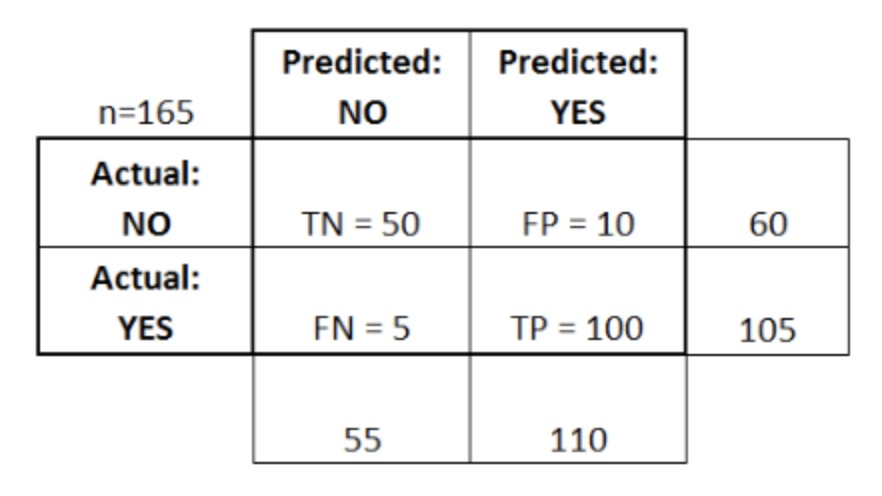

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

* Accuracy: Overall, how often is the classifier correct?
  * (TP+TN)/total = (100+50)/165 = 0.91
* Misclassification Rate: Overall, how often is it wrong?
  * (FP+FN)/total = (10+5)/165 = 0.09
  * equivalent to 1 minus Accuracy
  * also known as "Error Rate"
* True Positive Rate: When it's actually yes, how often does it predict yes?
  * TP/actual yes = 100/105 = 0.95
  * also known as "Sensitivity" or "Recall"
* False Positive Rate: When it's actually no, how often does it predict yes?
  * FP/actual no = 10/60 = 0.17
  * Specificity: When it's actually no, how often does it predict no?
* TN/actual no = 50/60 = 0.83
  * equivalent to 1 minus False Positive Rate
* Precision: When it predicts yes, how often is it correct?
  * TP/predicted yes = 100/110 = 0.91
* Prevalence: How often does the yes condition actually occur in our sample?
  * actual yes/total = 105/165 = 0.64

## Example confusion matrix for the Iris Data

#See labs for this unit for more details of this

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=1e6, multi_class="multinomial", solver="lbfgs")
model.fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)
class_labels = ["setosa", "versicolour", "virginica"]

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

#See labs for this unit for more details of this
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

Visualize them

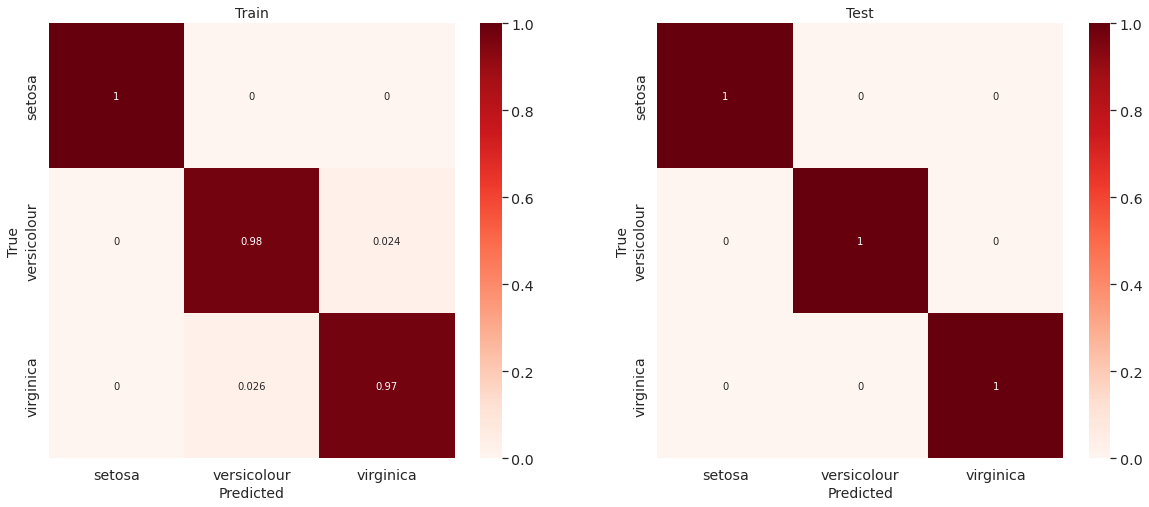

In [60]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

Looking at the confusions matrices for training, setosa perfectly separates from two other classes. In the test confusion matrix we see perfect classification (very unusual and suspect in the real world)

# Task:  20 class text classifier
Using the gridsearch pipeline presented in the previous section, please adapt it to get your best configuration using cross fold validation on all 20 classes from the 20 newsgroups dataset. Here are some hyperparameters to consider but don't limit yourself to these:

* penalty
* number of terms
* types of ngrams
* linear classifier
* TDIDF


Have fun! Please report your best score and configuration. And discuss your confusion matrix analysis for the best configuration.


##  Task: Pipeline & Grid search

This grid search will take some time (at least 20 minutes or more to run on a 4-core machine). Recall the following GridSearch will use all available cores: 

```python
GridSearchCV(pipelinee, parameters, cv=3, n_jobs=-1, verbose=1)
```

since `n_jobs` is set to `-1` 

Perform grid search where the score being used to evaluate each hyperparameter combination is `precision_macro`.

In [69]:
%%time

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

%matplotlib inline

##############################################################################
np.random.seed(42)

# Use all categories for the analysis

categories = None

print("Loading 20 newsgroups dataset:")

data = fetch_20newsgroups(subset='train', categories=categories)

print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()


# #############################################################################
# Define a pipeline combining  text feature extractors 
#countVectorizer and TfidfTransformer
# with SGDClassifier using log for loss and max_iter=5
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline(('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    #('tfidf', TfidfTransformer()), #ignore for now
    ('clf', SGDClassifier(loss='log', max_iter=5)) 
                   )
# TODO - change the following code
# pipeline =                     
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#



if __name__ == "__main__":
    # #############################################################################
    # Set up Grid search using the defined pipeline 
    # and parameters 
    # Make sure to use 3 folds for cross validation
    # use macro average precision scores scoring='precision_macro'
    # I.e., macro average: compute precision for each class and take avg
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    scoring='precision_macro'
    # select handful of parameters to explore
    parameters = {'vect__ngram_range': ((1,1),(1,2)),
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (.001, .0001), 
                  'clf__penalty': ('l1', 'l2', 'elasticnet'),
                  'clf__l1_ratio': (.1, .50)}
    grid_search = GridSearchCV(clf_pipe,params,cv=3,verbose=1, scoring='precision_macro')
    # TODO - change the following code
    #parameters = {'vect__ngram_range': ((1,1),(1,2)),
    #              'tfidf__use_idf': (True, False),
    #              'clf__alpha': (.001, .0001), 
    #              'clf__penalty': (.....), # please explore different regularization terms ('l1', 'l2', 'elasticnet'),
    #              'clf__l1_ratio': (.1,  .50)}
    # grid_search = GridSearchCV(.... scoring='precision_macro')                    
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
         #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
         print()

    '''print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print(classification_report(y_true, y_pred))
    print() 
    '''
    
    scoring='precision_macro'
     # Print best accuracy score and best parameter combination
    print("Best %s score: %0.3f" %(scoring, grid_search.best_score_))
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    #Sort the grid search results in decreasing order of average         
    sortedGridSearchResults = sorted(zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]), 
           key=lambda x: x[1], reverse=True)
    print(f'Top 2 GridSearch results: ({scoring}, hyperparam Combo)\n {sortedGridSearchResults[0]}\n {sortedGridSearchResults[1]}\n\n\n')
    #print(f'{grid_search.cv_results_['mean_test_score']}')
    print(f'{grid_search.cv_results_["mean_test_score"]}')
    print(f'{grid_search.cv_results_["params"]}')
    print(f'{grid_search.cv_results_}')  #show everything  
    # Please ignore the Convergence warnings as it is expected behavior
 

Loading 20 newsgroups dataset:
11314 documents
20 categories



TypeError: __init__() takes 2 positional arguments but 3 were given

## Confusion matrix for train data: 

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

400

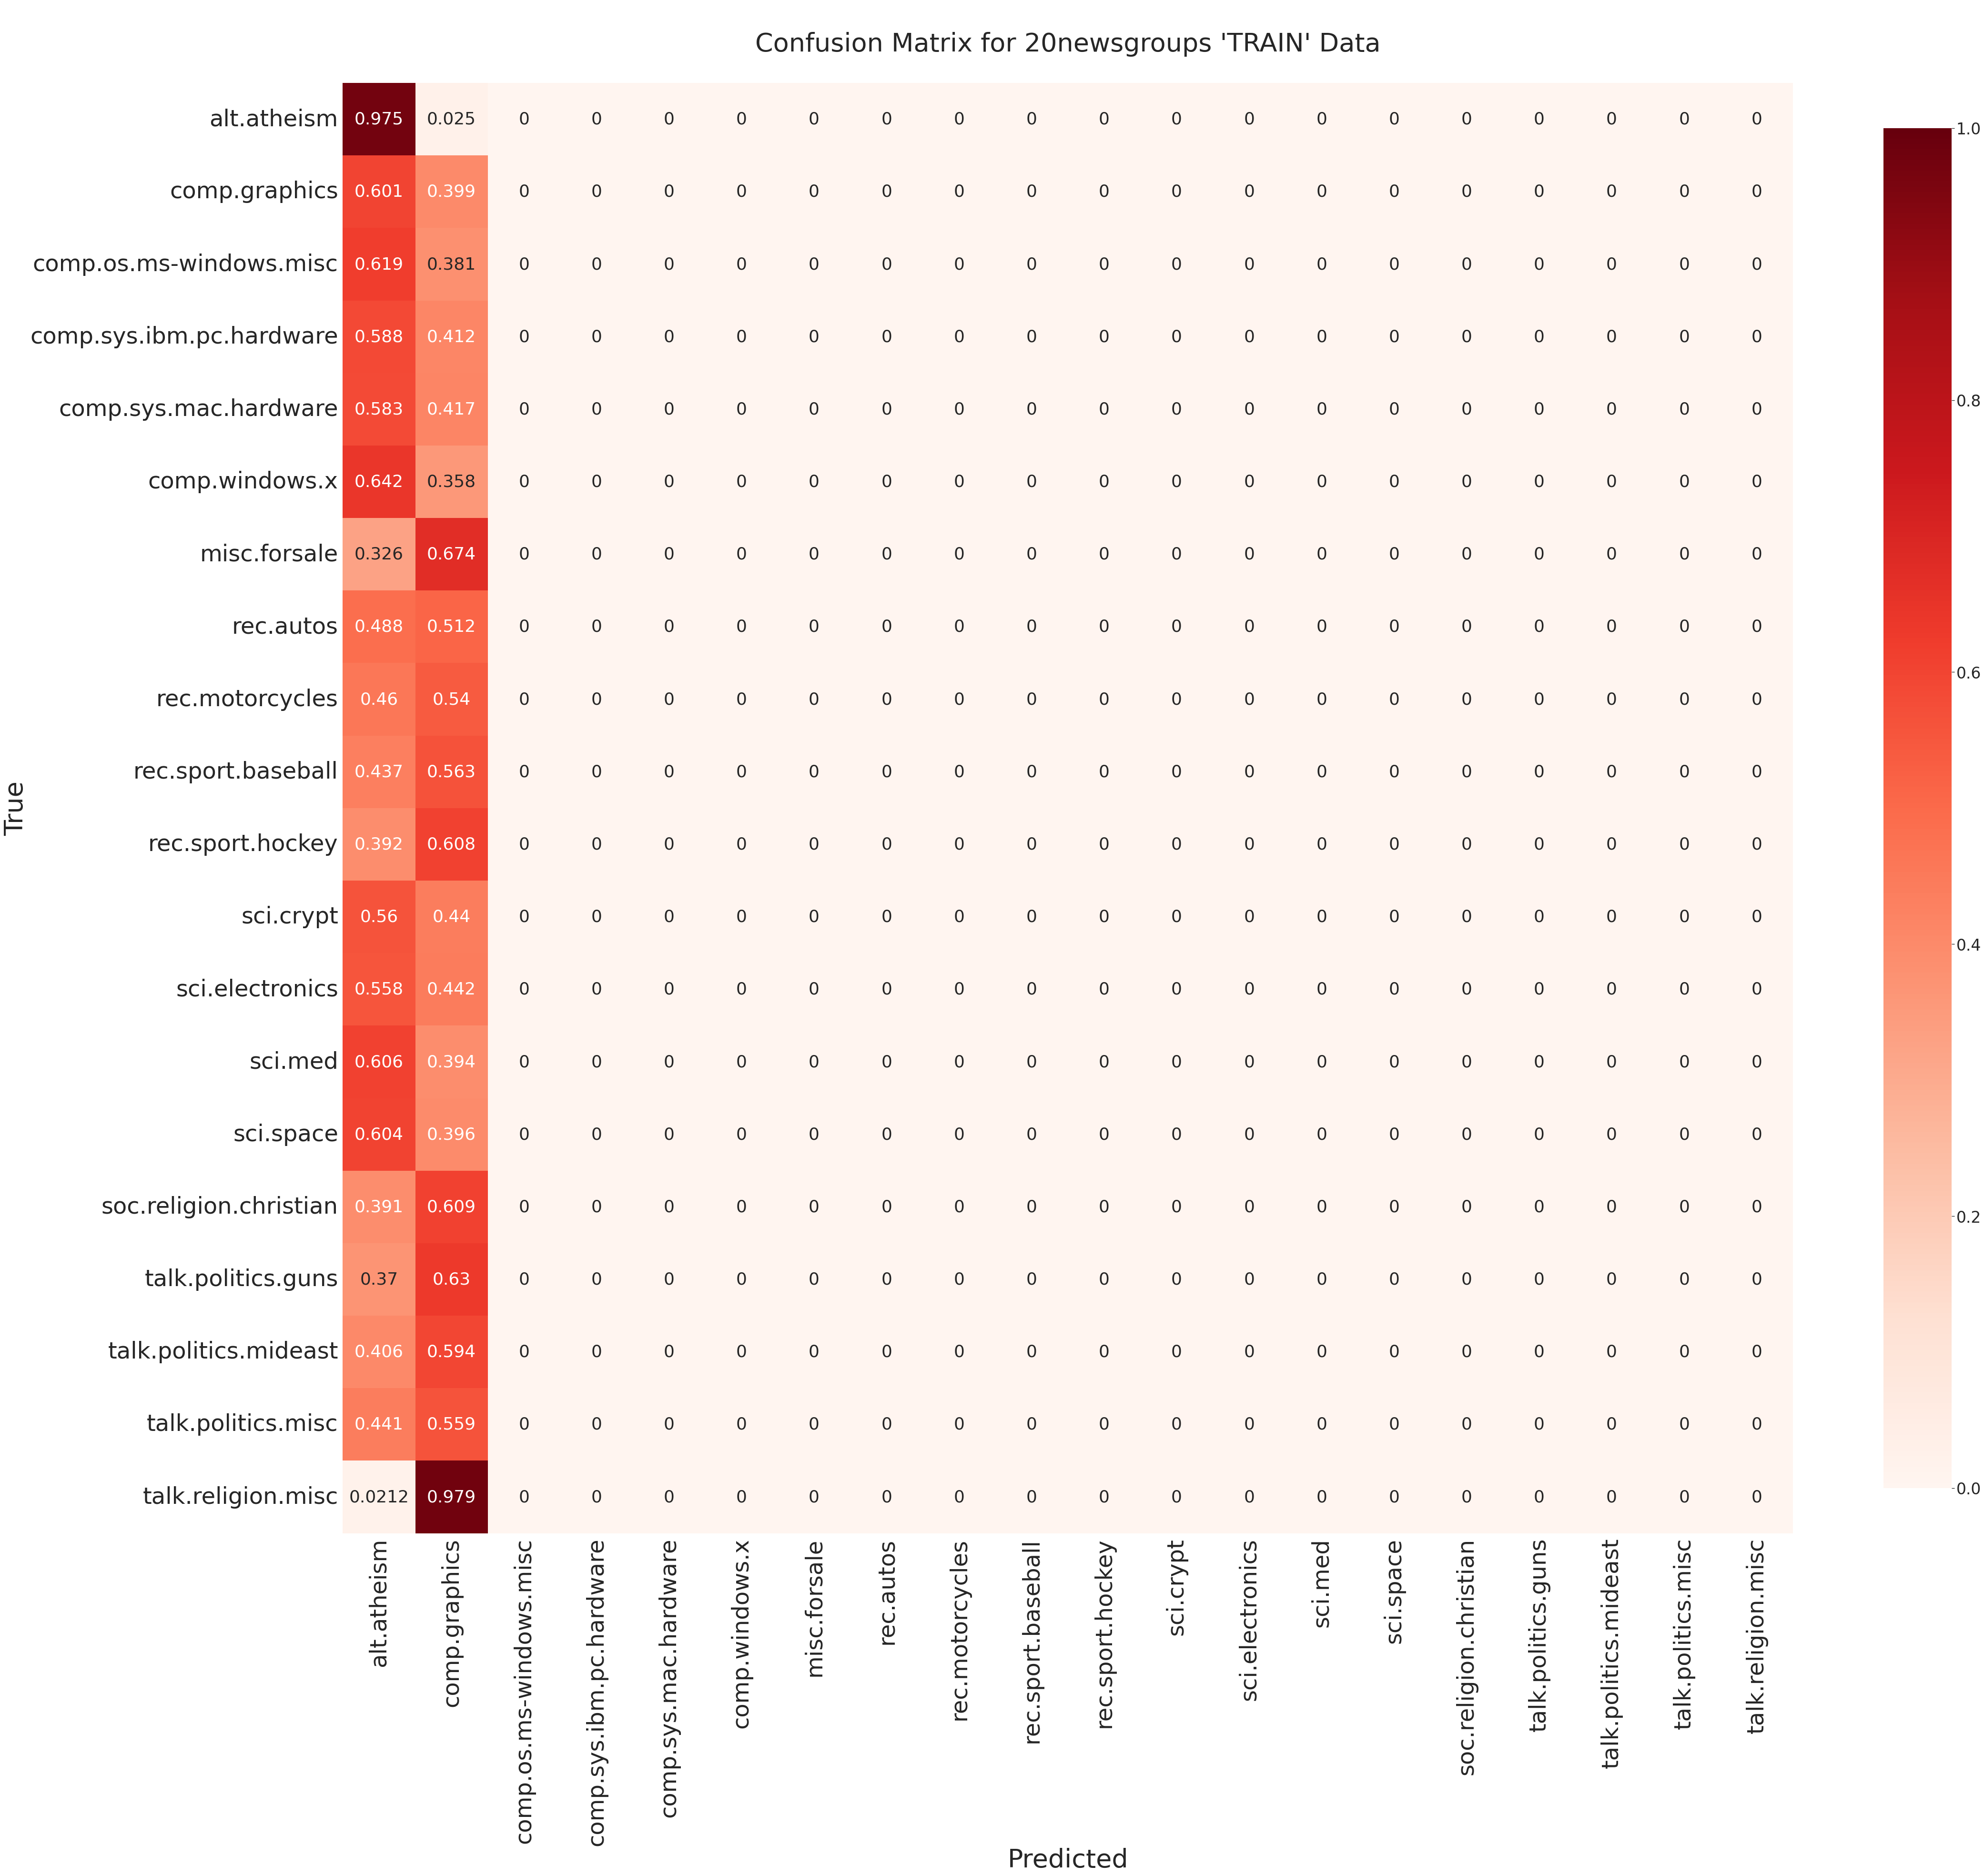

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'TRAIN' Data\n", fontsize=54);

## Confusion matrix for test data: 

In [72]:
data = fetch_20newsgroups(subset='test', categories=categories)

In [73]:
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

400

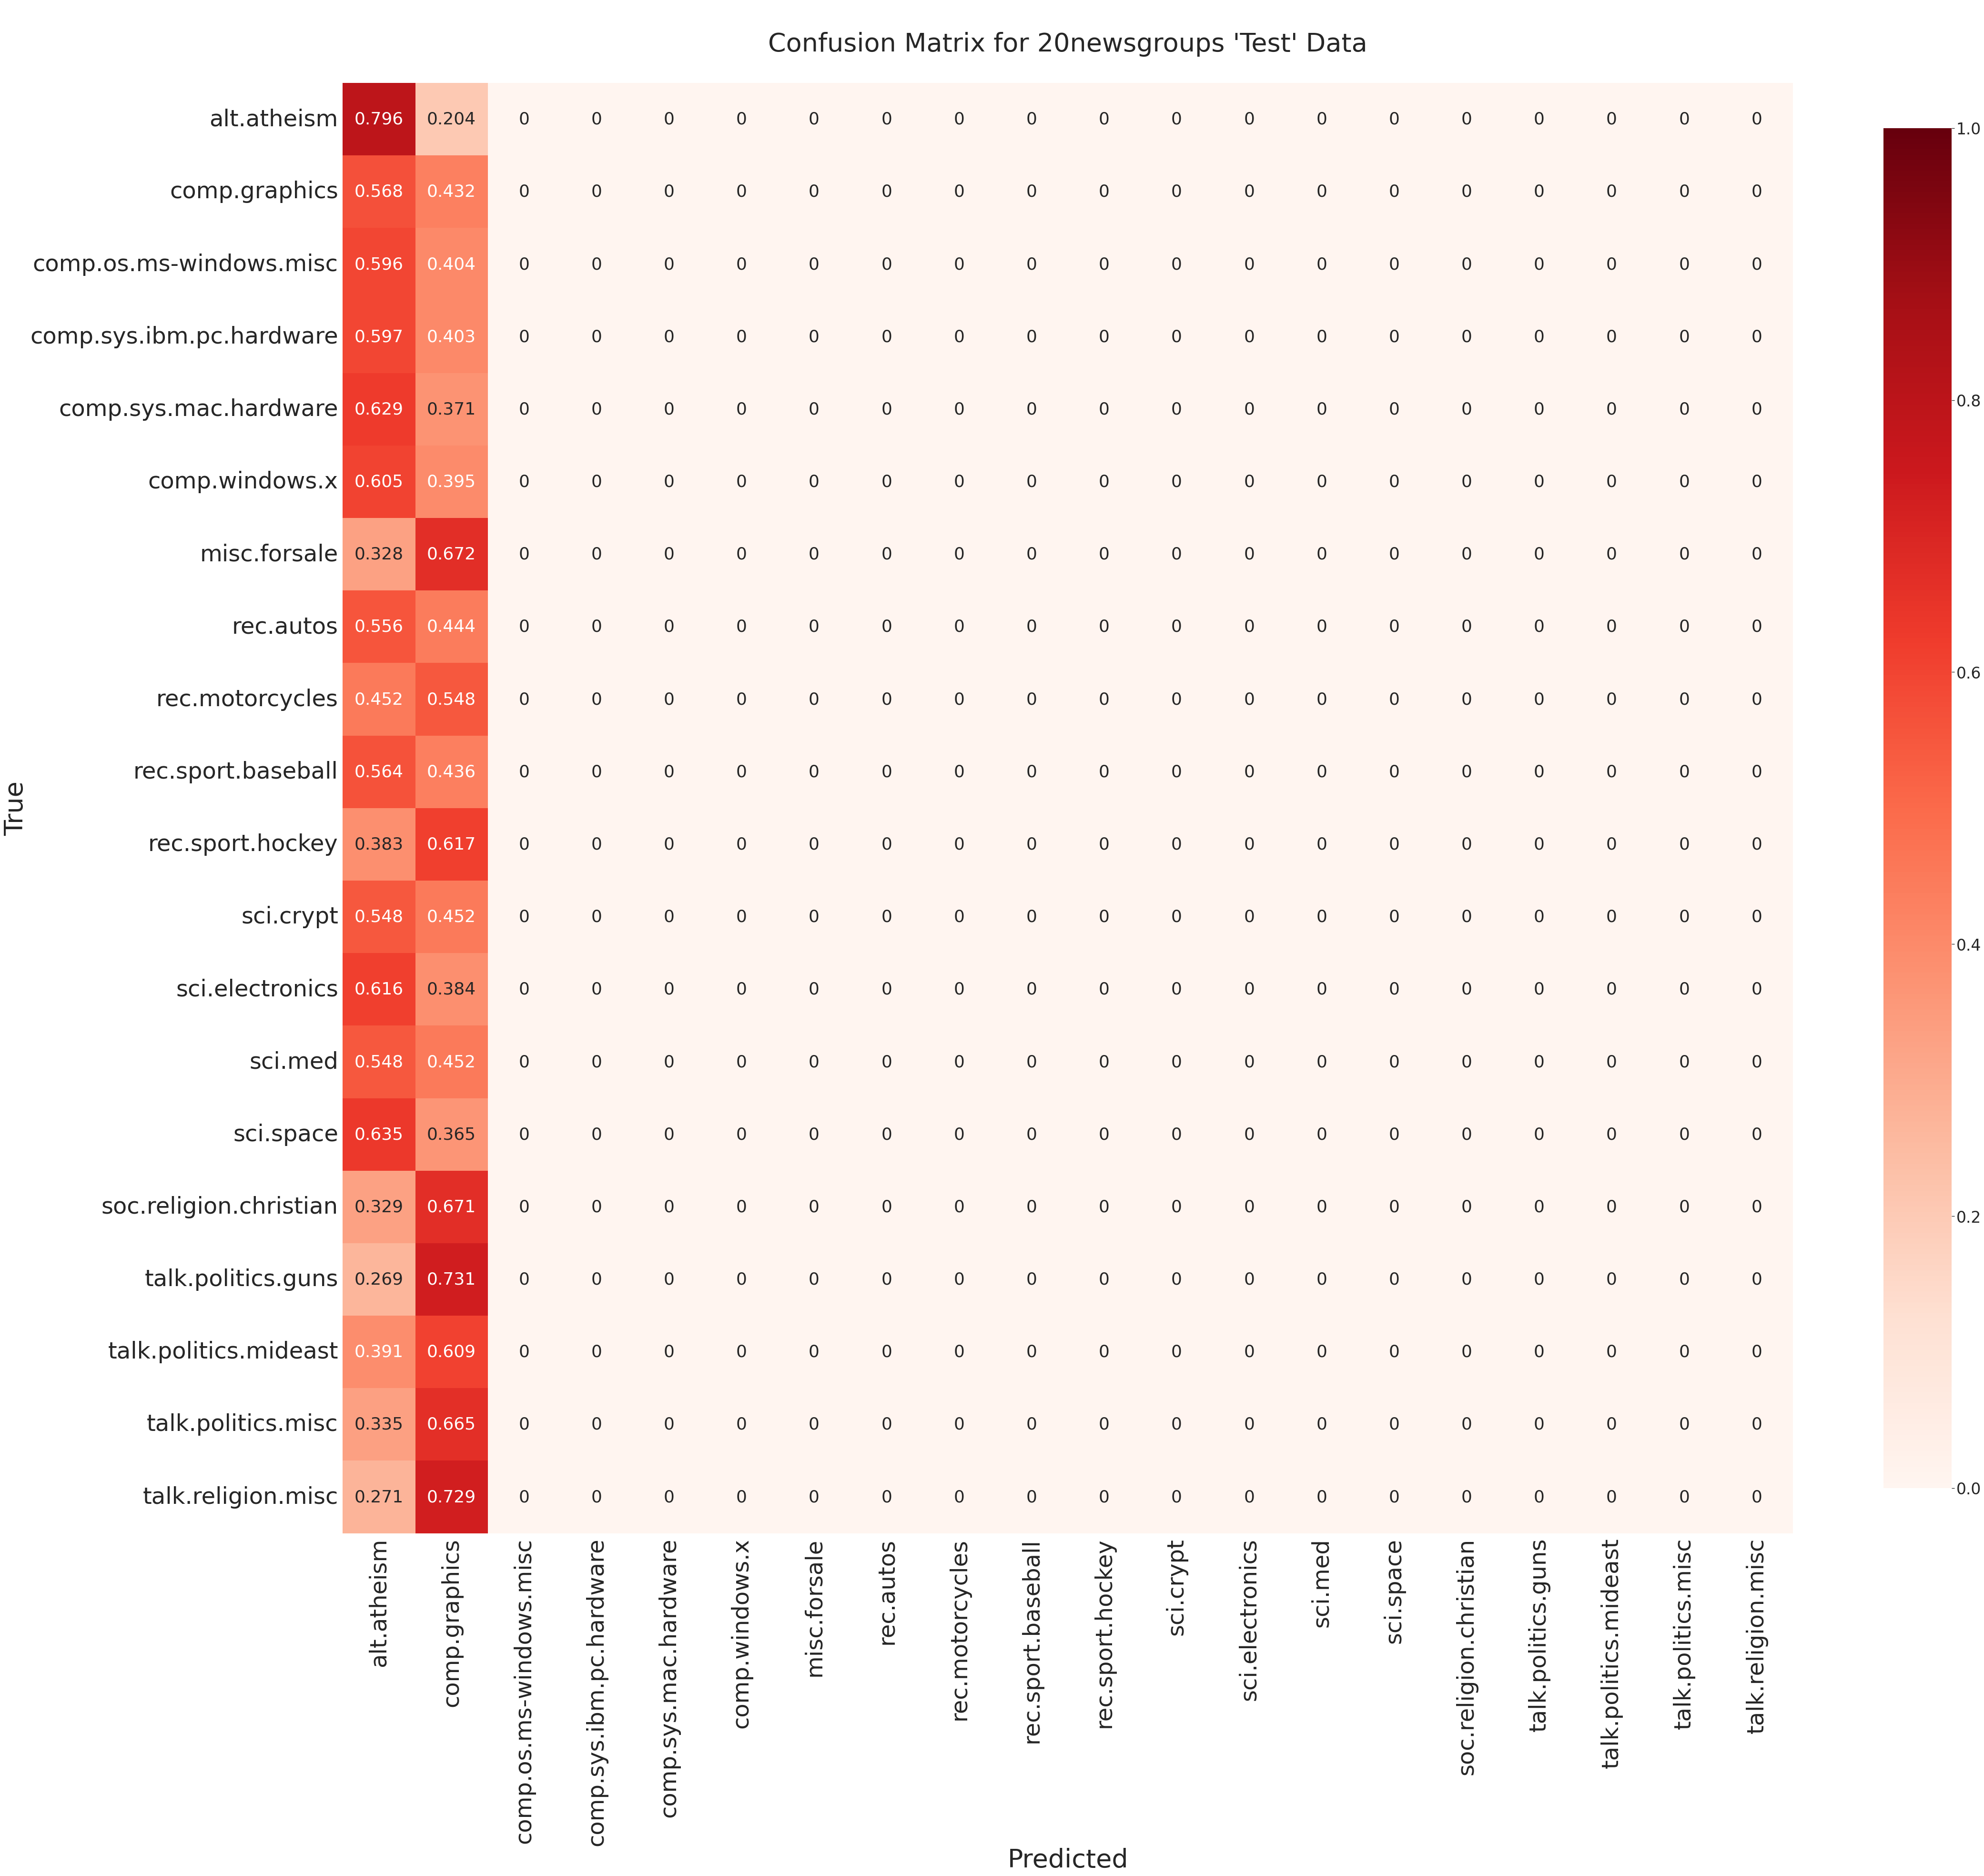

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'Test' Data\n", fontsize=54);

## OPTIONAL TASK:Improving baseline performance on the 20 newsgroups dataset

So far you are getting a macro precision of 90% on this dataset. There is a lot of scope for improvement.  Here, we would like you to build on your experience with this problem and learn a better pipeline as measured via different crossfold validation measures.  Please use the experimentLog to log interesting experiments, metrics, and results. The assignment notebook shows performing multi-class classification using models learnt with SGD in  a [one-vs-all technique](https://en.wikipedia.org/wiki/Multiclass_classification#:~:text=One%2Dvs.,-%2Drest&text=%2Dall%2C%20OvA%20or%20one%2D,all%20other%20samples%20as%20negatives.) style.  Please consult the SKLearn documentation for [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) for more details. What type of models does the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class learn? Does "Over-versus-rest" binary classifiers do better than a single multinomial model? Which style of model works best here?

Try to grid search using other criteria such F-Score (https://en.wikipedia.org/wiki/F-score)    Please report Accuracy. Precision, recall, and f1-beta scores for all experiments done for the test and training datasets.



In [76]:
%%time

from __future__ import print_function
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

%matplotlib inline

##############################################################################
np.random.seed(42)

# Use all categories for the analysis

categories = None

print("Loading 20 newsgroups dataset:")

data = fetch_20newsgroups(subset='train', categories=categories)
data_test = fetch_20newsgroups(subset='test', categories=categories)

print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("%d test documents" % len(data_test.filenames))
print("%d test categories" % len(data_test.target_names))


# #############################################################################
# Define a pipeline combining  text feature extractors 
# You can use the below given suggested pipeline or feel free to explore other models
# countVectorizer and TfidfTransformer
# with SGDClassifier using log for loss and max_iter=5
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    #('tfidf', TfidfTransformer()), #ignore for now
    ('clf', SGDClassifier(loss='log', max_iter=5))

])
# TODO - change the following code
# pipeline =                     
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#



if __name__ == "__main__":
    # #############################################################################
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    scoring='precision_macro'
    # select handful of parameters to explore
    parameters = {'vect__ngram_range': ((1,1),(1,2)),
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (.001, .0001), 
                  'clf__penalty': ('l1', 'l2', 'elasticnet'),
                  'clf__l1_ratio': (.1, .50)           
        # TODO - change the following code
        # Please play and experiment with all the parameters whichever available. You can refer cell 7.1 for the same and report the best parameters and results.
        
    }
    grid_search = GridSearchCV(clf_pipe,params,cv=3,verbose=1, scoring='precision_macro')
    # TODO - change the following code
    # parameters you can use: (but feel free to change these to explore)
    # parameters = {'vect__ngram_range': ((1,1),(1,2)),
    #              'tfidf__use_idf': (True, False),
    #              'clf__alpha': (.001, .0001), 
    #              'clf': (.....), # please explore different regularization terms ('l1', 'l2', 'elasticnet'),
    #              'clf__l1_ratio': (.1,  .50)}
    # grid_search = GridSearchCV(.... scoring='precision_macro')                    
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
         #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
         print()

    '''print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print(classification_report(y_true, y_pred))
    print() 
    '''
    
    scoring='precision_macro'
     # Print best accuracy score and best parameter combination
    print("Best %s score: %0.3f" %(scoring, grid_search.best_score_))
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    #Sort the grid search results in decreasing order of average         
    sortedGridSearchResults = sorted(zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]), 
           key=lambda x: x[1], reverse=True)
    print(f'Top 2 GridSearch results: ({scoring}, hyperparam Combo)\n {sortedGridSearchResults[0]}\n {sortedGridSearchResults[1]}\n\n\n')
    #print(f'{grid_search.cv_results_['mean_test_score']}')
    print(f'{grid_search.cv_results_["mean_test_score"]}')
    print(f'{grid_search.cv_results_["params"]}')
    print(f'{grid_search.cv_results_}')  #show everything  
    del experimentLog
    try: experimentLog 
    except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                                   "Description",])
    experimentLog.loc[len(experimentLog)] =[f"xxxxxxxx L2, C=1", "20 newsgroups", 
                                            f"{100*grid_search.score(data.data, data.target):.3f}%", f"{100*grid_search.score(data_test.data, data_test.target):.3f}%",
                                            "pipeline steps and hyperparameters"]
    display(experimentLog)

Loading 20 newsgroups dataset:
11314 documents
20 categories

7532 test documents
20 test categories


ValueError: Parameter grid for parameter (lr__C) needs to be a list or numpy array, but got (<class 'float'>). Single values need to be wrapped in a list with one element.

# Logistic Regression on 8x8  MNIST digit classification



## Digits dataset

TThe MNIST dataset is a set of handwritten digits, and our job is to build a computer program that takes as input an image of a digit, and outputs what digit it is.  The digits dataset consists of 8x8
pixel images of digits. 

* The `images` attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. 
* The `target` attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., 'png' files), we would load them using :func:`matplotlib.pyplot.imread`.



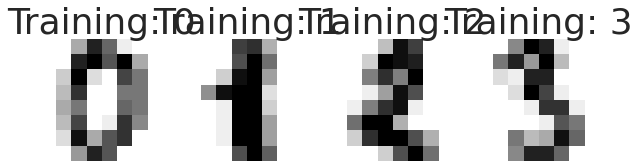

In [77]:
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### Data prep and splitting

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a logistic regressor classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [78]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#

data /= 255
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)



## Logistic Regression for MNIST digit classification

Training time: 0:00:00.154469
Time to compute test accuracy: 0:00:00.000040 Test size: 899





,Pipeline,Dataset,TrainAcc,TestAcc,Description
0,LogisticRegression without regularisation,MNIST 8x8,100.000%,92.992%,MNIST classifier


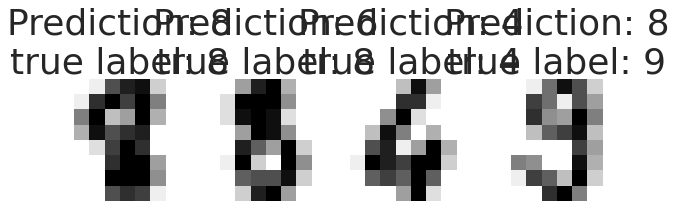

In [79]:
from __future__ import print_function, division
#from future.utils import iteritems
from builtins import range, input
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Import datasets, classifiers and performance metrics
digits = datasets.load_digits()

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the logistic regression digits classifier on the train subset
clf = LogisticRegression()
t0 = datetime.now()
clf.fit(X_train, Y_train)
print("Training time:", (datetime.now() - t0))

t0 = datetime.now()
# print(f"Train accuracy:{clf.score(X_train, Y_train):.3f}", )
# print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Y_train))

t0 = datetime.now()
# print(f"Test accuracy:{clf.score(X_test, Y_test):.3f}")
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Y_test))

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print("\n\n")
#Visualize predictions
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, true_label in zip(axes, X_test, predicted, Y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}\ntrue label: {true_label}")

del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Description",])
experimentLog.loc[len(experimentLog)] =[f"LogisticRegression without regularisation", "MNIST 8x8", 
                                        f"{100*clf.score(X_train, Y_train):.3f}%", f"{100*clf.score(X_test, Y_test):.3f}%",
                                        "MNIST classifier"]
display(experimentLog)

## Examine the Logistic Regression classification performance via confusion matrix

SKLearn provides the `~sklearn.metrics.classification_report` function to build  a text report showing
the main classification metrics.



In [80]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(Y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.95      0.91        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



'Confusion Matrix:'

array([[84,  0,  0,  0,  1,  0,  3,  0,  0,  0],
       [ 0, 82,  0,  1,  0,  1,  0,  0,  2,  5],
       [ 0,  0, 84,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 76,  0,  4,  0,  2,  7,  2],
       [ 0,  0,  0,  0, 84,  0,  4,  0,  0,  4],
       [ 0,  1,  0,  0,  0, 86,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 85,  0,  2],
       [ 0,  3,  1,  0,  0,  4,  1,  0, 79,  0],
       [ 1,  0,  0,  2,  0,  2,  0,  0,  1, 86]])

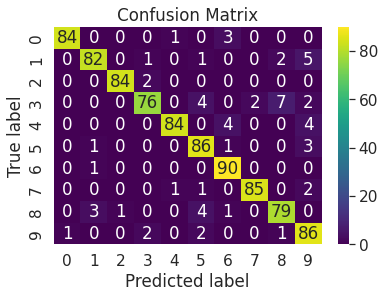

In [81]:
disp = metrics.confusion_matrix(Y_test, predicted)
display("Confusion Matrix:",disp)
sns.set(font_scale=1.4)
s = sns.heatmap(disp, annot=True, cmap = 'viridis').set(title = "Confusion Matrix", xlabel = "Predicted label", ylabel = "True label")
# disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

# plt.show()

### Visualize Logistic Regression model coefficients that were learned
Since there is a coefficient for each pixel in the 8x8 image, we can view them as an image itself.

In [82]:
clf.coef_.shape

(10, 64)

In [83]:
np.min(clf.coef_, 1)[1]

-0.3698066355811318

In [84]:
clf.intercept_

array([ 0.00047496, -0.06947085,  0.00039368,  0.02588731,  0.00694593,
       -0.01325067, -0.00226134,  0.01150026,  0.02793264,  0.01184808])

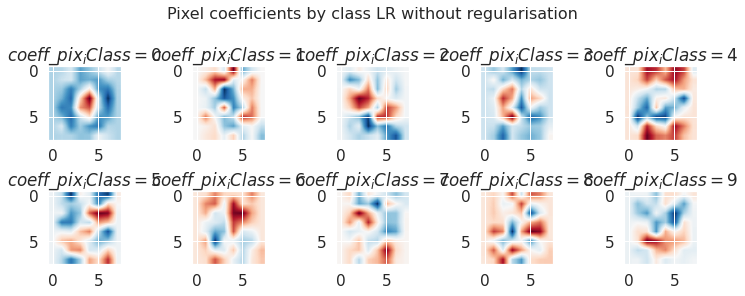

In [85]:
# plot the mean of each class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), constrained_layout=True)
fig.suptitle('Pixel coefficients by class LR without regularisation\n', fontsize=16)

axes = axes.reshape(-1)
for ax, class_i in  zip(axes, range(clf.coef_.shape[0])):
    #print(ax, class_i)
    ax.imshow(clf.coef_[class_i].reshape(8, 8)) 
    ax.imshow(clf.coef_[class_i].reshape(8, 8), 
              vmin=np.min(clf.coef_, 1)[class_i], vmax=np.max(clf.coef_, 1)[class_i],
              cmap=plt.cm.RdBu,
                interpolation='bilinear')
    ax.set_title(f"$coeff\_pix_i Class={class_i}$")

### Implementation of Logistic Regression with regularization

Use SKLearn's implementation of LogisticRegression() with L1 and L2 regularization!!

In [ ]:
from __future__ import print_function, division
from builtins import range, input
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, svm, metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LogisticRegression


# Import datasets, classifiers and performance metrics
digits = datasets.load_digits()

# flatten the images
# digits.target and digits.images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
#

data /=255 
X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the regularized logistic regression digits classifier on the MNIST
penalties = ['l1','l2']

#LogisticRegression(penalty='l1', C=param, solver='saga')
#c_params = [1.0, 10.0, 100.0, 1000.0, 10000.0] 


for penalty in penalties:
    model_logistic = LogisticRegression(penalty=penalty, C=100.0, solver='saga')
    model_logistic.fit(X_train, Y_train)
    # print(f"Train accuracy for logistic regression with {penalty} regularization: {model_logistic.score(X_train, Y_train):.3f}", )
    # print(f"Test accuracy for logistic regression with {penalty} regularization: {model_logistic.score(X_test, Y_test):.3f}")

    # Predict the value of the digit on the test subset
    predicted = model_logistic.predict(X_test)
    print("\n\n")
    #Visualize predictions
    _, axes = plt.subplots(nrows=1, ncols=7, figsize=(14, 3))
    for ax, image, prediction, true_label in zip(axes, X_test, predicted, Y_test):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"{penalty} Prediction: {prediction}\ntrue label: {true_label}")
            

### Visualize Logistic Regression model coefficients that were learned using with the l1_CXE loss function 
Since there is a coefficient for each pixel in the 8x8 image, we can view them as an image itself.

In [ ]:
model_logistic_l1 = LogisticRegression(penalty='l1', C=100.0, solver='saga')
model_logistic_l1.fit(X_train, Y_train)
# print(f"Train accuracy for logistic regression with l1 regularization: {model_logistic_l1.score(X_train, Y_train):.3f}", )
# print(f"Test accuracy for logistic regression with l1 regularization: {model_logistic_l1.score(X_test, Y_test):.3f}")

In [ ]:
clf = model_logistic_l1
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Description",])
experimentLog.loc[len(experimentLog)] =[f"LogisticRegression L1, C=100", "MNIST 8x8", 
                                        f"{100*clf.score(X_train, Y_train):.3f}%", f"{100*clf.score(X_test, Y_test):.3f}%",
                                        "MNIST classifier"]
display(experimentLog)
# plot the mean of each class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), constrained_layout=True)
fig.suptitle('Pixel coefficients by class for L1_CXE classifier\n', fontsize=16)

axes = axes.reshape(-1)
for ax, class_i in  zip(axes, range(clf.coef_.shape[0])):
    #print(ax, class_i)
    ax.imshow(clf.coef_[class_i].reshape(8, 8)) 
    ax.imshow(clf.coef_[class_i].reshape(8, 8), 
              vmin=np.min(clf.coef_, 1)[class_i], vmax=np.max(clf.coef_, 1)[class_i],
              cmap=plt.cm.RdBu,
                interpolation='bilinear')
    ax.set_title(f"$coeff\_pix_i Class={class_i}$")

### Task: Number of features discared by Logistic Regression model with l1 regularization for class 0

In [ ]:
model_logistic_l1.coef_[0] # coefficients for class 0 in the learnt logistic regression model

####  TASK L1 Regularization
For class 0 (digit = 0),  how many features are set to zero in the logistic regression model that is learned using an L1 regularization loss function?  

In [ ]:
# For class 0 (digit = 0),  how many features are set to zero in the logistic regression model that is learned 
# using an L1 regularization loss function?  
# HINT use sum or np.sum
#



### Visualize Logistic Regression model coefficients that were learned using with the l2_CXE loss function 
Since there is a coefficient for each pixel in the 8x8 image, we can view them as an image itself.

In [ ]:
model_logistic_l2 = LogisticRegression(penalty='l2', C=100.0, solver='saga')
model_logistic_l2.fit(X_train, Y_train)
# print(f"Train accuracy for logistic regression with l2 regularization: {model_logistic_l2.score(X_train, Y_train):.3f}", )
# print(f"Test accuracy for logistic regression with l2 regularization: {model_logistic_l2.score(X_test, Y_test):.3f}")
sum(model_logistic_l2.coef_[0]==0)

In [ ]:
clf = model_logistic_l2
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Description",])
experimentLog.loc[len(experimentLog)] =[f"LogisticRegression L2, C=100", "MNIST 8x8", 
                                        f"{100*clf.score(X_train, Y_train):.3f}%", f"{100*clf.score(X_test, Y_test):.3f}%",
                                        "MNIST classifier"]
display(experimentLog)

# plot the mean of each class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), constrained_layout=True)
fig.suptitle('Pixel coefficients by class for L2_CXE classifier\n', fontsize=16)

axes = axes.reshape(-1)
for ax, class_i in  zip(axes, range(clf.coef_.shape[0])):
    #print(ax, class_i)
    ax.imshow(clf.coef_[class_i].reshape(8, 8)) 
    ax.imshow(clf.coef_[class_i].reshape(8, 8), 
              vmin=np.min(clf.coef_, 1)[class_i], vmax=np.max(clf.coef_, 1)[class_i],
              cmap=plt.cm.RdBu,
                interpolation='bilinear')
    ax.set_title(f"$coeff\_pix_i Class={class_i}$")

# TASK Homegrown implementation of Logistic Regression [OPTIONAL]

Below is a homegrown implementation of Logistic Regression. In this class  we added an ability to trace validation metrics.

In [ ]:
class LogisticRegressionHomegrown(object):
    
    def __init__(self):
        """
        Constructor for the homgrown Logistic Regression
        
        Args:
            None
        
        Return:
            None
        """
        self.coef_ = None       # weight vector
        self.intercept_ = None  # bias term
        self._theta = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.history = {"cost": [], 
                        "acc": [], 
                        "val_cost":[], 
                        "val_acc": []}
        
    def _grad(self, X, y):
        """
        Calculates the gradient of the Logistic Regression 
        objective function

        Args:
            X(ndarray):    train objects
            y(ndarray):    answers for train objects
            
        Return:
            grad(ndarray): gradient
        """
        # number of training examples
        n = X.shape[0]
        
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(...)
        
        # transform scores to probabilities
        # softmax
        exp_scores = np.exp(...)
        probs = ... / np.sum(..., axis=1, keepdims=True)
        
        # error
        probs[range(n),y] -= 1
        
        # gradient
        gradient = np.dot(..., ...) / ...
        
        return gradient
    
    def _gd(self, X, y, max_iter, alpha, X_val, y_val):
        """
        Runs Full GD and logs error, weigths, gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        for i in range(max_iter):
            
            metrics = self.score(X, y)
            self.history["cost"].append(metrics["cost"])
            self.history["acc"].append(metrics["acc"])
            
            if X_val is not None:
                metrics_val = self.score(X_val, y_val)
                self.history["val_cost"].append(metrics_val["cost"])
                self.history["val_acc"].append(metrics_val["acc"])

            # calculate gradient
            grad = self._grad(..., ...)
            
            # do gradient step
            self._theta -= ... * grad
    
    def fit(self, X, y, max_iter=1000, alpha=0.05, val_data=None):
        """
        Public API to fit Logistic regression model
        
        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        if val_data is not None:
            X_val, y_val = val_data
            X_val = np.c_[np.ones(X_val.shape[0]), X_val]
        else:
            X_val = None
            y_val = None
        # initialize if the first step
        if self._theta is None:
            self._theta = np.random.rand(X.shape[1], len(np.unique(y)))
        
        # do full gradient descent
        self._gd(..., ..., max_iter, alpha, X_val, y_val)
        
        # get final weigths and bias
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
    def score(self, X, y):
        """
        Computes logloss and accuracy for (X, y)
        
        Args:
            X(ndarray):      objects
            y(ndarray):      answers for objects
            
        Return:
            metrics(dict):   python dictionary which
                             contains two fields: for accuracy 
                             and for objective function
        """
        # number of training samples
        n = X.shape[0]
        
        # get scores
        scores = self._predict_raw(X)
        
        # trasnform scores to probabilities
        exp_scores = np.exp(...)
        probs = ... / np.sum(..., axis=1, keepdims=True)
        
        # logloss per each example
        corect_logprobs = -np.log(probs[range(n),y])
        
        # total mean logloss
        data_loss = np.sum(...) / n
        
        # predictions
        pred = np.argmax(..., axis=1)
        # accuracy
        acc = accuracy_score(y, pred)
        
        # final metrics
        metrics = {"acc": acc, "cost": data_loss}
        
        return metrics
        
    def _predict_raw(self, X):
        """
        Computes scores for each class and each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            scores(ndarray): scores for each class and object
        """
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            scores = np.dot(X, self._theta)
        else:
            scores = np.dot(X, self.coef_) + self.intercept_
        return scores
    
    def predict(self, X):
        """
        Predicts class for each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            pred(ndarray):   class for each object
        """
        # get scores for each class
        scores = self._predict_raw(...)
        # choose class with maximum score
        pred = np.argmax(..., axis=1)
        return pred

**Do not forget** to scale data before using this class. It is crucial.

## Reload CIFAR-10 dataset and split train/test sets

In [ ]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.1
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)


In [ ]:
# scale data 
np.random.seed(42)
if np.max(X_train) > 4.:
    X_train = X_train.astype(np.float32) / 255.
if np.max(X_test) > 4.:
    X_test = X_test.astype(np.float32) / 255.
y_train=y_train.astype(int)
y_test=y_test.astype(int)

Defining a model

In [ ]:
model_lr_homegrown = LogisticRegressionHomegrown()


Fitting example

In [ ]:
model_lr_homegrown.fit(X_train, y_train, max_iter=10, alpha=0.05)

And we come up with all the $\text{nan's}$ for objective function

In [ ]:
model_lr_homegrown.history["cost"]

And accuracy also does not change

In [ ]:
model_lr_homegrown.history["acc"]

In [ ]:
y_preds = model_lr_homegrown.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_preds)

In [ ]:
results = pd.DataFrame(columns=['Model','Accuracy'])

In [ ]:
results.loc[len(results)] = ["LR Homegrown", np.round(acc, 3)]
results

## Task: Softmax Numerical Stability
What can be causing this kind of problem ("NaN")? (Hint: see the lecture slides "Numerical Stability for softmax function")
* Please fix this problem
* Next section has some background to help shed some light

### Working with np.max and matrices
Explore the code in the following section first to see why/how!

In [ ]:
## Working with np.max, softmax, and matrices
import numpy as np

# For more info on np.max check the following link :
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.amax.html

#GOAL: On a per row basis: Substract  max of that row from each element in that row
#ATTEMPT #1: 
f = np.array([[1, 2, 3],[4, 5, 6]])
f1 = f - np.max(f)
# this does not work as expected - as np.max(f) returns the overall max 
print ("Is this correct?")
print ("Adjusted data1", f1)

# take max of f per row 
#ATTEMPT #2: pay attention to axis and keepdims
f2 = f - np.max(f, axis=1, keepdims=True)
print ("Adjusted data2", f2)


#Normalised score to sum to 1
f=([1,3,6], [2,4,6])
p = f / np.sum(f,axis=1, keepdims=True)
print ("Normalised score...\n", p)

# The following data will not work with for the softmax calculation
# out of bounds
perpendicularDistances = np.array([[123, 234, 345],[444, 555, 999]])
probs = np.exp(perpendicularDistances) / np.sum(np.exp(perpendicularDistances), axis=1, keepdims=True)
print("This produces NaNs: (see SECOND ROW) \n", probs)
# need to use adjusted data 
perpendicularDistances -= np.max(perpendicularDistances, axis=1, keepdims=True)
# trasnform scores to probabilities
exp_scores = np.exp(perpendicularDistances)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
print ("Probabilities...\n", probs)

In [ ]:
class FixedLogisticRegressionHomegrown(LogisticRegressionHomegrown):
    
    def __init__(self):
        # call the constructor of the parent class
        super(FixedLogisticRegressionHomegrown, self).__init__()
        
    #==================================================#
    #               Place your code here               #
    #     Redefine a method which causes the error     #
    
    #               Hint: only one method              #
    #==================================================#
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    
    def _predict_raw(self, X):
        """
        Computes scores for each class and each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            scores(ndarray): scores for each class and object
        """
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            scores = np.dot(..., ...)
        else:
            scores = np.dot(..., ...) + ...
        
        # normalize raw scores to prevent overflow
        scores -= np.max(..., axis=1, keepdims=True)
        
        return scores
    ''' HINT def .......(self, X):
        """
        ...... each class and each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            ...(ndarray): ...... each class and object
        """
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            scores = np.dot(X, self._theta)
        else:
            scores = np.dot(X, self.coef_) + self.intercept_
        
        
        
        return ...
    '''
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#


Defining a model

In [ ]:

model_lr_homegrown_fixed = FixedLogisticRegressionHomegrown()

Fitting example

In [ ]:
model_lr_homegrown_fixed.fit(X_train, y_train, max_iter=2000, alpha=0.05, val_data=(X_test, y_test))

In [ ]:
plt.figure(figsize=(20, 8))
plt.suptitle("Homegrown Logistic Regression")
plt.subplot(121)
plt.plot(model_lr_homegrown_fixed.history["cost"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_cost"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(model_lr_homegrown_fixed.history["acc"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_acc"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Accuracy");

Prediction

In [ ]:
y_pred_test = model_lr_homegrown_fixed.predict(X_test)

Accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred_test)

Keeping table of results up-to-date

In [ ]:
results.loc[len(results)] = ["LR Homegrown Fix 1", np.round(acc, 3)]
results

## Task: improve by tuning training algo.
Look at the plots obtained at the end of task 1 (it fluctuates a lot). This behaviour is very common to stochastic gradient descent. But here we are using full GD. What could be causing this problem? (*Hint*: a hyperparameter of the training algorithm)
* Describe what's going on on the plots that you got
* Try to fix it (*Hint*: you do NOT need to change the class implemented before)

P.S.
Test accuracy before this fix should be about 26%. This should jump to  31% after. 

In [ ]:
np.random.seed(42)
# Use FixedLogisticRegressionHomegrown() to fit a model
# using 6500 for max_iter, a step of 0.02 and 
# X_test, y_test for validation
#==================================================#
#               Your code starts here              #
#==================================================#
model_lr_homegrown_fixed = ...
model_lr_homegrown_fixed.fit(...)
#TODO - change the following code
# model_lr_homegrown_fixed = 
# model_lr_homegrown_fixed.fit()             
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


In [ ]:
plt.figure(figsize=(20, 8))
plt.suptitle("Homegrown Logistic Regression")
plt.subplot(121)
plt.plot(model_lr_homegrown_fixed.history["cost"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_cost"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(model_lr_homegrown_fixed.history["acc"], label="Train")
plt.plot(model_lr_homegrown_fixed.history["val_acc"], label="Test")
plt.legend(loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Accuracy");

In [ ]:
y_pred_test = model_lr_homegrown_fixed.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_test)

In [ ]:
results.loc[len(results)] = ["LR Homegrown Fix 2", np.round(acc, 3)]
results

** Note: I was able to get about 29% test set accuracy with all the fixes and tunes**

## Task : Visualize the  weight vectors
Visualize the  weight vectors (like images) for each class for both Sklearn learnt model and best homegrown learnt model. Can you see any class patterns? How long did it take to run? in both cases?

### Task : Use all training data and visualize the  weight vectors
Try to use all the training data to learn a classification model  Sklearn and then visual the resulting weight vectors. Notice any differences. How long did it take to run?

In [ ]:
%%time
model_lr_sklearn = LogisticRegression()
model_lr_sklearn.fit(X_train, y_train)

In [ ]:

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    normalized_coef = (model_lr_sklearn.coef_[i] - np.min(model_lr_sklearn.coef_[i])) \
                      / (np.max(model_lr_sklearn.coef_[i]) - np.min(model_lr_sklearn.coef_[i])) * 255.
    show_pic(normalized_coef)
    plt.title(classes[i])
plt.suptitle("Sklearn weight vectors")
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    
    # change the code below in order to normalize the coefficients
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    normalized_coef = (model_lr_homegrown_fixed.coef_[:, i] - ...) \
                      / (np.max(model_lr_homegrown_fixed.coef_[:, i]) - ...) * 255.
    
    #TODO - change the following code
    # Normalize to [0, 1] interval and then scale to [0, 255]
    # normalized_coef = (model_lr_homegrown_fixed.coef_[:, i] ........             
    #          
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#

    show_pic(normalized_coef)
    plt.title(classes[i])
plt.suptitle("Homegrown weight vectors")
plt.show()

## T-SNE dimensionality reduction.

See [this](https://www.dropbox.com/s/q0lrqtphxh5j4uv/6-Mapping_Representations-tSNE-visualize-DL-Model-Layers.ipynb?dl=0) notebook and also search materials on the internet (e.g. [this](http://distill.pub/2016/misread-tsne/) one) on T-SNE (t-Distributed Stochastic Neighbor Embedding).

Perform this embedding (there is [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) implementation) on first three classes and 500 examples per each of them (this is done ro reduce the execution time)

In [ ]:
from sklearn.manifold.t_sne import TSNE
tsne = TSNE()

In [ ]:
X_train_transformed = tsne.fit_transform(X_train[(y_train == 0) + (y_train == 1) + (y_train == 2)])
y_train_transformed = y_train[(y_train == 0) + (y_train == 1) + (y_train == 2)]

In [ ]:
plt.figure(figsize=(10, 8))
colors = ["r", "g", "b"]
for cl in range(3):
    idx = y_train_transformed == cl
    plt.scatter(X_train_transformed.T[0][idx], X_train_transformed.T[1][idx], c=colors[cl], label="Class " + str(cl))
plt.legend()
plt.show()